**Calculating free energy and probabilities**

In [10]:
from IPython.display import SVG
import RNA
import math
import random
import path_finding as pf
import evolution as ev

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Create a fold compound for an RNA sequence
seq = "GCGCGAUACG"
fc = RNA.fold_compound(seq)

# Define a test structure (dot-bracket notation)
struct = "((....)).."

# Evaluate the free energy of the structure
energy = fc.eval_structure(struct)
print("Free energy: {:.2f} kcal/mol".format(energy))

Free energy: 6.40 kcal/mol


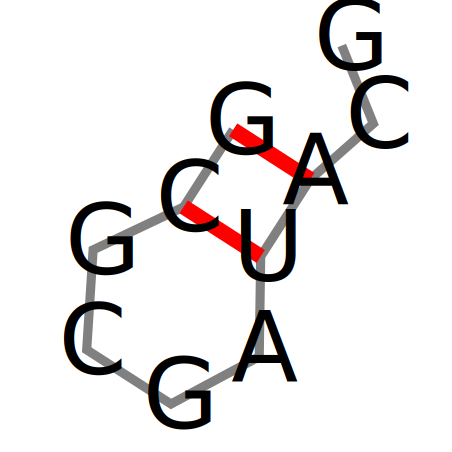

In [4]:
RNA.svg_rna_plot(seq, structure=struct, ssfile="tmp.svg")
SVG("tmp.svg")

In [11]:
pf.generate_moves("GCGCUAUACG", "(..)......")

[('..........', 'remove', (1, 4)),
 ('(..)(..)..', 'add', (5, 8)),
 ('(..)(....)', 'add', (5, 10)),
 ('(..)..(..)', 'add', (7, 10))]

In [16]:
moves = pf.generate_moves("GCGCUAUACG", "(..)(..)..")
pf.move_probabilities(moves, fc)

TypeError: move_probabilities() missing 1 required positional argument: 'fc'

In [13]:
# Create the ViennaRNA fold compound for our sequence.
fc = RNA.fold_compound(seq)
init_struct = ".........."

# 1) Generate all one-base moves
moves = pf.generate_moves(seq, init_struct)
print("Generated Moves:")
for m in moves:
    print(m)

# 2) Compute probabilities for each move based on Boltzmann law
probs = pf.move_probabilities(moves, fc)
print("\nMove Probabilities:")
for m, p in zip(moves, probs):
    print(f"Move: {m[1]} at positions {m[2]}, Structure: {m[0]}, Probability: {p:.4f}")

# 3) Randomly select the next structure using the computed probabilities
next_struct, move_info = pf.select_next_structure(seq, init_struct, fc)
print("\nSelected Next Structure:")
print("Structure:", next_struct)
print("Move Info:", move_info)

Generated Moves:
('(..)......', 'add', (1, 4))
('(.....)...', 'add', (1, 7))
('(.......).', 'add', (1, 9))
('.(..).....', 'add', (2, 5))
('.(.......)', 'add', (2, 10))
('..(...)...', 'add', (3, 7))
('..(.....).', 'add', (3, 9))
('...(.....)', 'add', (4, 10))
('....(...).', 'add', (5, 9))
('......(..)', 'add', (7, 10))

Move Probabilities:
Move: add at positions (1, 4), Structure: (..)......, Probability: 0.0000
Move: add at positions (1, 7), Structure: (.....)..., Probability: 0.0203
Move: add at positions (1, 9), Structure: (.......)., Probability: 0.3023
Move: add at positions (2, 5), Structure: .(..)....., Probability: 0.0000
Move: add at positions (2, 10), Structure: .(.......), Probability: 0.0784
Move: add at positions (3, 7), Structure: ..(...)..., Probability: 0.0159
Move: add at positions (3, 9), Structure: ..(.....)., Probability: 0.3417
Move: add at positions (4, 10), Structure: ...(.....), Probability: 0.1133
Move: add at positions (5, 9), Structure: ....(...)., Probability

In [37]:
# Example data:
seq = "GGGGAAACUCC"
start_struct = "(..(...)..)"
end_struct = "...((...))."  # target structure

# Create a fold compound for the sequence (ViennaRNA initialization)
fc = RNA.fold_compound(seq)

# 1. Initialize population of size N
N = 100
population = ev.init_population(seq, start_struct, N)

# Let's run evolution for a number of steps and print progress
max_steps = 100
step = 0
print("Generation 0:")
# for ind in population:
#     d = structure_distance(ind['structure'], end_struct)
#     print(f"Structure: {ind['structure']}, Distance: {d}")

while step<max_steps and ev.compute_barrier(population) is None:
    step += 1
    population = ev.evolve_population_inclusive(population, seq, fc, start_struct, end_struct)
    # For reporting, update distances and print
    print(f"\nGeneration {step}:")
    #for ind in population:
        #print(f"Structure: {ind['structure']}, Distance: {ind['distance']}, Move: {ind['move_info']}")

# Optionally, report the best candidate at the final generation:
best = min(population, key=lambda ind: ind['distance'])
print("\nBest candidate after evolution:")
print(f"Structure: {best['structure']}, Distance: {best['distance']}, Energy barrier: {best['highest_energy']} kcal/mol")
print(f"Energy barrier: {ev.compute_barrier(population)} kcal/mol")

Generation 0:

Generation 1:

Generation 2:

Generation 3:

Generation 4:

Generation 5:

Generation 6:

Generation 7:

Generation 8:

Generation 9:

Best candidate after evolution:
Structure: ...((...))., Distance: 0, Energy barrier: 0 kcal/mol
Energy barrier: 0 kcal/mol


In [79]:
# Example data 2:
seq = "ACACGACCUCAUAUAAUCUUGGGAAUAUGGCCCAUAAGUUUCUACCCGGCAACCGUAAAUUGCCGGACUAUGCAGGGAAGUG"
start_struct = "......................(....................)....(.............)..................."
end_struct = ".(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))"  # target structure

# Create a fold compound for the sequence (ViennaRNA initialization)
fc = RNA.fold_compound(seq)

# 1. Initialize population of size N
N = 100
population = ev.init_population(seq, start_struct, N)

max_steps = 500
step = 0
print("Generation 0:")
# for ind in population:
#     d = structure_distance(ind['structure'], end_struct)
#     print(f"Structure: {ind['structure']}, Distance: {d}")

while step<max_steps and ev.compute_barrier(population) is None:
    step += 1
    population = ev.evolve_population_inclusive(population, seq, fc, start_struct, end_struct)
    # For reporting, update distances and print
    print(f"\nGeneration {step}:")
    print(population[0])
    #for ind in population:
        #print(f"Structure: {ind['structure']}, Distance: {ind['distance']}, Move: {ind['move_info']}")

best = min(population, key=lambda ind: ind['distance'])
print("\nBest candidate after evolution:")
print(f"Structure: {best['structure']}, Distance: {best['distance']}, Energy barrier: {best['highest_energy']} kcal/mol")
print(f"Number of steps necessary to reach the target structure: {step}")

Generation 0:

Generation 1:
{'structure': '......................(....................)...((.............))..................', 'distance': 38, 'highest_energy': 0}

Generation 2:
{'structure': '......................(....................)...(((...........)))..................', 'distance': 36, 'highest_energy': 0}

Generation 3:
{'structure': '...............................................(((...........)))..................', 'distance': 36, 'highest_energy': 0}

Generation 4:
{'structure': '..............................................((((...........)))).................', 'distance': 34, 'highest_energy': 0}

Generation 5:
{'structure': '.............................................(((((...........)))))................', 'distance': 32, 'highest_energy': 0}

Generation 6:
{'structure': '.............................................((((((.........))))))................', 'distance': 30, 'highest_energy': 0}

Generation 7:
{'structure': '............................................

Idées:

Changer la température
Faire du transfert learning
Mettre une pénalité suivant la distance ?, l'énergie


In [84]:
ev.best_folding(seq, end_struct, start_struct, N=100, max_steps=100, alpha=0.3, T=T_CONST, beta=10)


Generation 10:
{'structure': '......(((...........(((.......)))............(((((...........))))).......)))......', 'distance': 20, 'highest_energy': 9.300000190734863}

Generation 20:
{'structure': '......................(.......).................(.............)...................', 'distance': 2, 'highest_energy': 26.40000009536743}

Generation 30:
{'structure': '......................(.......).................(.............)...................', 'distance': 2, 'highest_energy': 26.40000009536743}

Generation 40:
{'structure': '......................(.......).................(.............)...................', 'distance': 2, 'highest_energy': 26.40000009536743}

Generation 50:
{'structure': '......................(.......).................(.............)...................', 'distance': 2, 'highest_energy': 26.40000009536743}

Generation 60:
{'structure': '......................(.......).................(.............)...................', 'distance': 2, 'highest_energy': 26.4000000

({'structure': '......................(.......).................(.............)...................',
  'distance': 2,
  'highest_energy': 26.40000009536743},
 100)